In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime, date
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/dataset1/Transactions_cleaned1.xlsx
/kaggle/input/dataset1/Customer_demographics_cleaned1.xlsx
/kaggle/input/dataset1/New_Customer_cleaned1.xlsx
/kaggle/input/dataset1/Customer_address_cleaned1.xlsx


In [2]:
tr_df = pd.read_excel('/kaggle/input/dataset1/Transactions_cleaned1.xlsx')
ca_df = pd.read_excel('/kaggle/input/dataset1/Customer_address_cleaned1.xlsx')
cd_df = pd.read_excel('/kaggle/input/dataset1/Customer_demographics_cleaned1.xlsx',)
nc_df = pd.read_excel('/kaggle/input/dataset1/New_Customer_cleaned1.xlsx')

In [3]:
cd_df['customer_id'].value_counts(ascending=False)

1       1
2673    1
2660    1
2661    1
2662    1
       ..
1340    1
1341    1
1342    1
1343    1
4000    1
Name: customer_id, Length: 3997, dtype: int64

In [4]:
tr_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12


In [5]:
ca_df.head()

,customer_id,state,property_valuation
0,1,NSW,10
1,2,NSW,10
2,4,QLD,9
3,5,NSW,4
4,6,VIC,9


In [6]:
ca_df.isna().sum()

customer_id           0
state                 0
property_valuation    0
dtype: int64

In [7]:
ca_df.duplicated().sum()

0

In [8]:
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   state               3999 non-null   object
 2   property_valuation  3999 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 93.9+ KB


<AxesSubplot: title={'center': 'The number of clients from the three states'}>

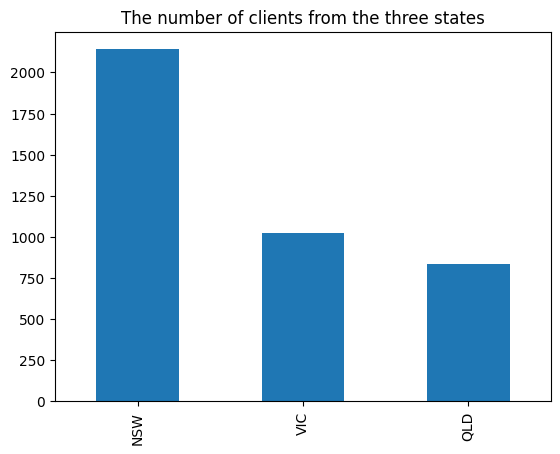

In [9]:
ca_df['state'].value_counts().plot(kind='bar', title='The number of clients from the three states')

<AxesSubplot: title={'center': 'The property valuation of the clients'}>

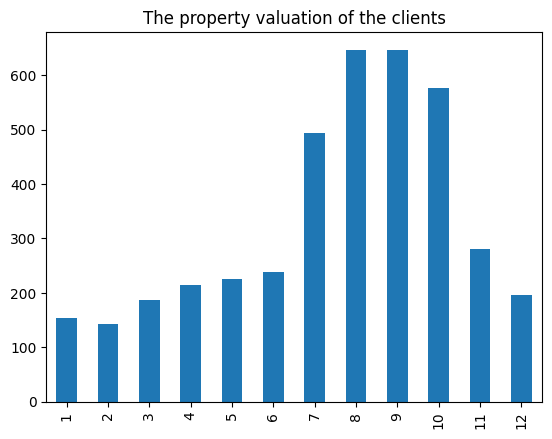

In [10]:
x_axis_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
ca_df['property_valuation'].value_counts().loc[x_axis_order].plot(kind='bar', title='The property valuation of the clients')

<AxesSubplot: xlabel='state', ylabel='property_valuation'>

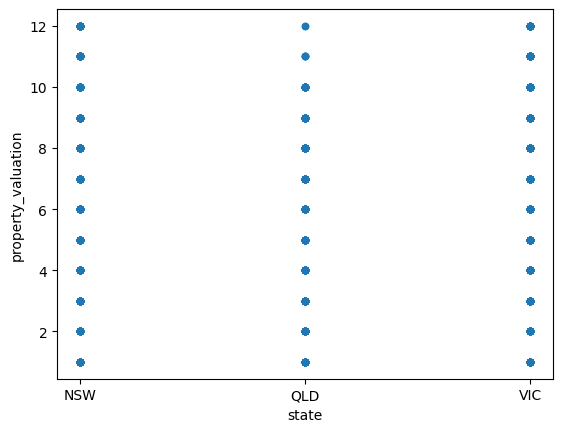

In [11]:
ca_df.plot(kind='scatter', x='state', y='property_valuation')

In [12]:
ca_df[['state', 'property_valuation']].dropna().corr()

/tmp/ipykernel_20/4036797010.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ca_df[['state', 'property_valuation']].dropna().corr()


,property_valuation
property_valuation,1.0


the results here are not complete so we should convert the 'state' to a numeric value:
'NSW' : 1
'QLD' : 2
'VIC' : 3

In [13]:
ca_df['state'] = ca_df['state'].map({'NSW' : 1, 'QLD' : 2, 'VIC' : 3})

In [14]:
ca_df.head()

,customer_id,state,property_valuation
0,1,1,10
1,2,1,10
2,4,2,9
3,5,1,4
4,6,3,9


In [15]:
ca_df[['state', 'property_valuation']].dropna().corr()

,state,property_valuation
state,1.000000,-0.222889
property_valuation,-0.222889,1.000000


In [16]:
cd_df.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,AgeGroup
0,1,Female,93,Executive Secretary,Health,Mass Customer,Yes,11.0,69.0,older
1,2,Male,81,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,42.0,forties
2,3,Male,61,Recruiting Manager,Property,Mass Customer,Yes,15.0,69.0,older
3,4,Male,33,NaN,IT,Mass Customer,No,7.0,61.0,older
4,5,Female,56,Senior Editor,NaN,Affluent Customer,Yes,8.0,46.0,forties


In [17]:
ca_df.isna().sum()

customer_id           0
state                 0
property_valuation    0
dtype: int64

In [18]:
ca_df.duplicated().sum()

0

In [19]:
cd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3997 entries, 0 to 3996
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3997 non-null   int64  
 1   gender                               3997 non-null   object 
 2   past_3_years_bike_related_purchases  3997 non-null   int64  
 3   job_title                            3491 non-null   object 
 4   job_industry_category                3341 non-null   object 
 5   wealth_segment                       3997 non-null   object 
 6   owns_car                             3997 non-null   object 
 7   tenure                               3910 non-null   float64
 8   age                                  3910 non-null   float64
 9   AgeGroup                             3910 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 312.4+ KB


In [20]:
cd_df['job_title'].isna()

0       False
1       False
2       False
3        True
4       False
        ...  
3992    False
3993    False
3994    False
3995     True
3996    False
Name: job_title, Length: 3997, dtype: bool

In [21]:
for i in cd_df.columns:
    print(f"Distinct values of {i}: {cd_df[i].unique()}")
    print('-'*75)

Distinct values of customer_id: [   1    2    3 ... 3998 3999 4000]
---------------------------------------------------------------------------
Distinct values of gender: ['Female' 'Male' 'Unkown']
---------------------------------------------------------------------------
Distinct values of past_3_years_bike_related_purchases: [93 81 61 33 56 35  6 31 97 49 99 58 38 85 91 57 79 76 72 74 43 55 12 37
  5 62 18  3 17 44 40 46 64 24 63 98 51 68 22  2 48 87 26 60 47 73 21 67
 16 78 30 94 28 20 11  1 75 41 69 19 80 83 25 54  4 23 65 88 10 77  9 82
 27 53 32 34 71 36 90 95  8 39  7 42 13 45 50 14 89 84 96 59 70 66  0 15
 86 92 29 52]
---------------------------------------------------------------------------
Distinct values of job_title: ['Executive Secretary' 'Administrative Officer' 'Recruiting Manager' nan
 'Senior Editor' 'Media Manager I' 'Business Systems Development Analyst'
 'Senior Quality Engineer' 'Nuclear Power Engineer' 'Developer I'
 'Account Executive' 'Junior Executive' 'Medi

here I will drop the 'job_title' column and keep the two columns of 'job_industry' and 'wealth_segment'

In [22]:
cd_df = cd_df.drop(labels=['job_title'], axis=1)

In [23]:
cd_df

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,age,AgeGroup
0,1,Female,93,Health,Mass Customer,Yes,11.0,69.0,older
1,2,Male,81,Financial Services,Mass Customer,Yes,16.0,42.0,forties
2,3,Male,61,Property,Mass Customer,Yes,15.0,69.0,older
3,4,Male,33,IT,Mass Customer,No,7.0,61.0,older
4,5,Female,56,NaN,Affluent Customer,Yes,8.0,46.0,forties
...,...,...,...,...,...,...,...,...,...
3992,3996,Female,8,Health,Mass Customer,No,19.0,47.0,forties
3993,3997,Female,87,Manufacturing,High Net Worth,Yes,1.0,21.0,twenties
3994,3998,Unkown,60,IT,High Net Worth,No,NaN,NaN,NaN
3995,3999,Male,11,Manufacturing,Affluent Customer,Yes,10.0,49.0,forties


now I will divide the 'past_3_years_bike_related_purchases' column into intervalls:

In [24]:
cd_df['p3y_bike_purchases'] = "" # add an empty column to the dataframe
cd_df['p3y_bike_purchases'][ cd_df['past_3_years_bike_related_purchases'] < 100 ] = '80-100' 
cd_df['p3y_bike_purchases'][ cd_df['past_3_years_bike_related_purchases'] < 80 ] = '60-80'
cd_df['p3y_bike_purchases'][ cd_df['past_3_years_bike_related_purchases'] < 60 ] = '40-60'
cd_df['p3y_bike_purchases'][ cd_df['past_3_years_bike_related_purchases'] < 40 ] = '20-40'
cd_df['p3y_bike_purchases'][ cd_df['past_3_years_bike_related_purchases'] < 20 ] = '0-20'

/tmp/ipykernel_20/2067553616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_df['p3y_bike_purchases'][ cd_df['past_3_years_bike_related_purchases'] < 100 ] = '80-100'
/tmp/ipykernel_20/2067553616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_df['p3y_bike_purchases'][ cd_df['past_3_years_bike_related_purchases'] < 80 ] = '60-80'
/tmp/ipykernel_20/2067553616.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_df['p3y_b

In [25]:
cd_df.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,age,AgeGroup,p3y_bike_purchases
0,1,Female,93,Health,Mass Customer,Yes,11.0,69.0,older,80-100
1,2,Male,81,Financial Services,Mass Customer,Yes,16.0,42.0,forties,80-100
2,3,Male,61,Property,Mass Customer,Yes,15.0,69.0,older,60-80
3,4,Male,33,IT,Mass Customer,No,7.0,61.0,older,20-40
4,5,Female,56,NaN,Affluent Customer,Yes,8.0,46.0,forties,40-60


In [26]:
#cd_df = cd_df.drop(labels=['past_3_years_bike_related_purchases'], axis=1)

In [27]:
cd_df

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,age,AgeGroup,p3y_bike_purchases
0,1,Female,93,Health,Mass Customer,Yes,11.0,69.0,older,80-100
1,2,Male,81,Financial Services,Mass Customer,Yes,16.0,42.0,forties,80-100
2,3,Male,61,Property,Mass Customer,Yes,15.0,69.0,older,60-80
3,4,Male,33,IT,Mass Customer,No,7.0,61.0,older,20-40
4,5,Female,56,NaN,Affluent Customer,Yes,8.0,46.0,forties,40-60
...,...,...,...,...,...,...,...,...,...,...
3992,3996,Female,8,Health,Mass Customer,No,19.0,47.0,forties,0-20
3993,3997,Female,87,Manufacturing,High Net Worth,Yes,1.0,21.0,twenties,80-100
3994,3998,Unkown,60,IT,High Net Worth,No,NaN,NaN,NaN,60-80
3995,3999,Male,11,Manufacturing,Affluent Customer,Yes,10.0,49.0,forties,0-20


In [28]:
cd_df['owns_car'] = cd_df['owns_car'].map({'Yes' : 1, 'No' : 0})

/tmp/ipykernel_20/3478514271.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=cd_df['past_3_years_bike_related_purchases'])


<AxesSubplot: ylabel='Density'>

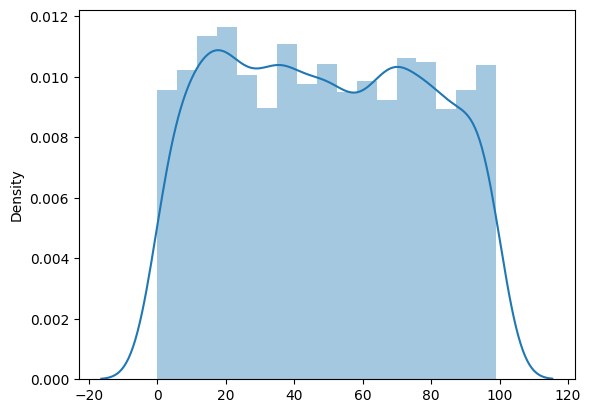

In [29]:
sns.distplot(x=cd_df['past_3_years_bike_related_purchases'])

/tmp/ipykernel_20/759195631.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=cd_df['owns_car'])


<AxesSubplot: ylabel='Density'>

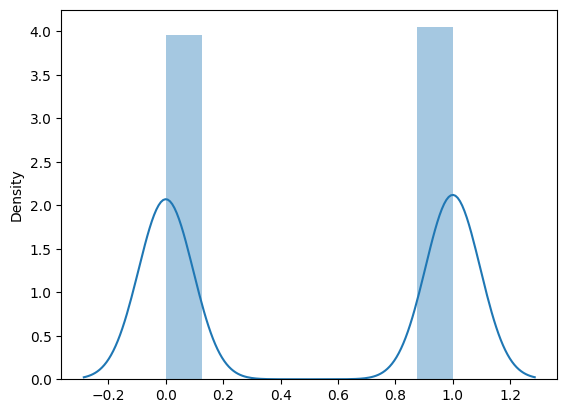

In [30]:
sns.distplot(x=cd_df['owns_car'])

/tmp/ipykernel_20/951577230.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=cd_df['tenure'])


<AxesSubplot: ylabel='Density'>

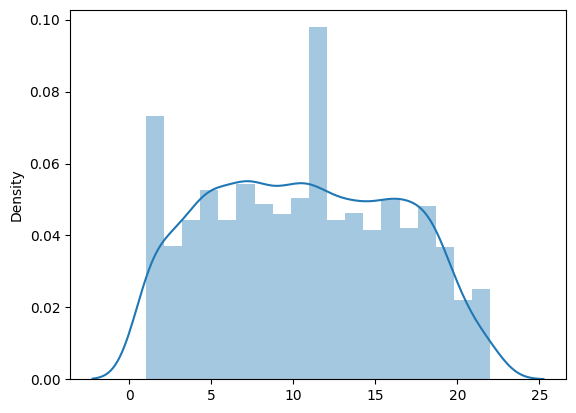

In [31]:
sns.distplot(x=cd_df['tenure'])

/tmp/ipykernel_20/1464202997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=cd_df['age'])


<AxesSubplot: ylabel='Density'>

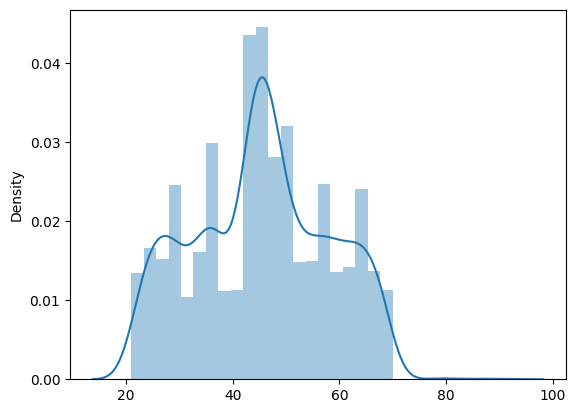

In [32]:
sns.distplot(x=cd_df['age'])

<AxesSubplot: xlabel='wealth_segment', ylabel='owns_car'>

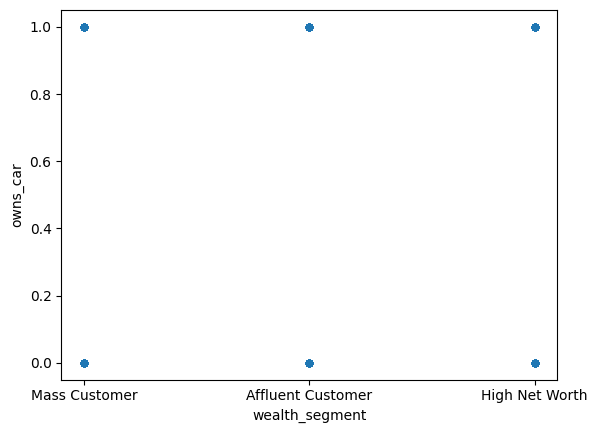

In [33]:
cd_df.plot(kind='scatter', x='wealth_segment', y='owns_car')

<AxesSubplot: xlabel='owns_car', ylabel='count'>

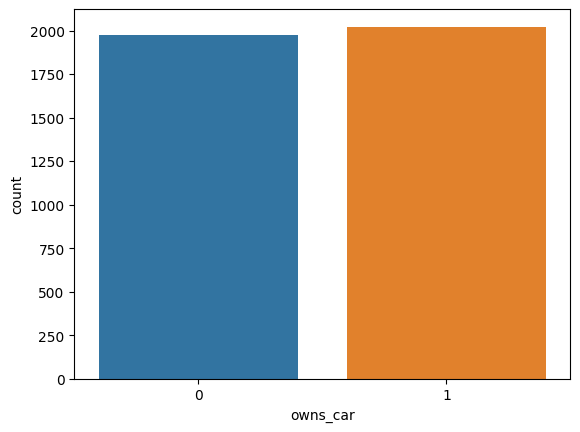

In [34]:
sns.countplot(x=cd_df['owns_car'])

In [35]:
#ca_df['state'].query("gender = Male")
#value_counts().plot(kind='bar', title='The number of clients from the three states')